**importing the required libraries**

In [123]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
import mplsoccer
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

# **Player wise**

## **Getting the input from the user and parsing the content**

In [124]:
player_id = str(input("Please, Enter player id: "))
try:
    url = 'https://understat.com/player/'+ player_id
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    player_name = soup.find_all('div',{"class":"header-wrapper"})
    player_name = player_name[0].text.strip().replace(' ','_')
    print(player_name, ':\t', url)
except:
    print('Player not found')

Mohamed_Salah :	 https://understat.com/player/1250


In [125]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

## **Summary data for every single match**

In [126]:
def GetMatchesData():
    
    '''This function gets the matches data from the json file.'''

    strings = scripts[4].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    goals=[]
    shots=[]
    xg=[]
    time_played=[]
    postion=[]
    h_team=[]
    a_team=[]
    season=[]
    dates = []
    xA = []
    assists = []
    key_passes = []
    npg = []
    npxG = []
    xGChain = []
    xGBuildup = []
    
    for i in range(len(json_data)):
        goals.append((json_data[i]['goals']))
        shots.append((json_data[i]['shots']))
        xg.append(json_data[i]['xG'])
        time_played.append(json_data[i]['time'])
        postion.append(json_data[i]['position'])
        h_team.append(json_data[i]['h_team'])
        a_team.append(json_data[i]['a_team'])
        season.append(json_data[i]['season'])
        dates.append(json_data[i]['date'])
        xA.append(json_data[i]['xA'])
        assists.append((json_data[i]['assists']))
        key_passes.append(json_data[i]['key_passes'])
        npg.append(json_data[i]['npg'])
        npxG.append(json_data[i]['npxG'])
        xGChain.append(json_data[i]['xGChain'])
        xGBuildup.append(json_data[i]['xGBuildup'])

    df = pd.DataFrame({'Position':postion, 'Home team':h_team, 'Away team':a_team, 'Season':season,
                                'Date':dates,'goals Scored':goals,'Non-penalty goals':npg,'Assists':assists,
                                 'shots':shots,'Key passes':key_passes,'Time played':time_played, 'xG':xg,
                                   'xA':xA,'Non-penalty xG':npxG,'xG Chain':xGChain, 'xG Buildup':xGBuildup})

    for col in list(df.columns)[11:]:
        df[col] = df[col].astype(float).round(3)
    
    for col in list(df.columns)[5:11]:
        df[col] = df[col].astype(int)
    
    df.to_csv(f'{player_name}_matches_data.csv')
    return df

x = GetMatchesData()
display(x)

,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
0,FWR,Fulham,Liverpool,2022,2022-08-06,1,1,0,2,1,90,0.392,0.534,0.392,1.104,0.712
1,Sub,Liverpool,Wolverhampton Wanderers,2021,2022-05-22,1,1,0,8,0,27,1.167,0.000,1.167,0.564,0.088
2,Sub,Aston Villa,Liverpool,2021,2022-05-10,0,0,0,1,1,15,0.128,0.069,0.128,0.196,0.000
3,FWR,Liverpool,Tottenham,2021,2022-05-07,0,0,0,3,2,90,0.254,0.010,0.254,0.264,0.000
4,Sub,Newcastle United,Liverpool,2021,2022-04-30,0,0,0,2,1,19,0.084,0.039,0.084,0.123,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,FWL,Sassuolo,Fiorentina,2014,2015-02-14,1,1,1,3,2,82,0.459,0.224,0.459,0.705,0.022
261,Sub,Fiorentina,Atalanta,2014,2015-02-08,0,0,0,1,3,24,0.097,0.271,0.097,0.273,0.097
262,Sub,Tottenham,Chelsea,2014,2015-01-01,0,0,0,1,1,15,0.440,0.026,0.440,0.483,0.017
263,Sub,Crystal Palace,Chelsea,2014,2014-10-18,0,0,0,0,0,2,0.000,0.000,0.000,0.000,0.000


## **Season Stats**

In [127]:
def playerSeasonStats(get_matches_data):
    
    '''This function gets the player season stats.'''

    df = get_matches_data
    season = input("Please, Enter season: ")
    try:
        df = df.loc[(df['Season'] == season )].reset_index(drop=True)
        print(f"{player_name} stats in {int(season)}/{int(season)+1} season:")
        print("*   {} minutes in {} matches ".format((df['Time played'].sum()),len(df['Time played'])))
        print("*   {} Goals and {} assists ".format((df['goals Scored'].sum()),int(df['Assists'].sum())))
        print("*   {} XG and {} XA ".format(df['xG'].sum().round(3),df['xA'].sum().round(3)))
        print("*   {} Shots ".format(int(df['shots'].sum())))
        print("*   {} Key passes ".format(int(df['Key passes'].sum())))
    except:
        print("Season not found, please try again.")

playerSeasonStats(get_matches_data=x)

Mohamed_Salah stats in 2019/2020 season:
*   2904 minutes in 34 matches 
*   19 Goals and 10 assists 
*   20.663 XG and 8.726 XA 
*   132 Shots 
*   60 Key passes 


## **Career Stats**

In [128]:
def CareerStats():
    
    '''This function gets the player career stats.'''

    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    games = [int(x["games"]) for x in json_data["season"]]
    mins = [int(x['time']) for x in json_data["season"]]
    goals = [int(x["goals"])for x in json_data["season"]]
    shots = [int(x["shots"])for x in json_data["season"]]
    xg = [float(x["xG"])for x in json_data["season"]]
    assists = [int(x["assists"])for x in json_data["season"]]
    xa = [float(x["xA"])for x in json_data["season"]]
    season = [x["season"] for x in json_data["season"]]
    team = [x["team"]for x in json_data["season"]]
    yellow = [int(x["yellow"]) for x in json_data["season"]]
    red = [x["red"] for x in json_data["season"]]
    np_g = [x["npg"] for x in json_data["season"]]
    np_xg = [x["npxG"] for x in json_data["season"]]
    xg_chain = [x["xGChain"] for x in json_data["season"]]
    xg_buildup = [x["xGBuildup"] for x in json_data["season"]]

    df = pd.DataFrame({ 'Season': season, 'Team': team, 'Mins': mins,'App.': games,
                    'Goals': goals, 'Shots': shots, 'xG': xg, 'Assists': assists, 
                'xA': xa, 'Yellow cards': yellow, 'Red cards': red, 'npG': np_g,
                    'npxG': np_xg, 'xGChain': xg_chain, 'xGBuildup': xg_buildup})

    for col in ["xG","xA",'npxG','xGChain','xGBuildup']:
        df[col] = df[col].astype(float).round(3)

    df['Season'] = df['Season'].astype(int)

    df = df.sort_values(by=['Season'])
    df.to_csv(f"{player_name}_CareerStats.csv")
    display(df.reset_index(drop=True))

CareerStats()

,Season,Team,Mins,App.,Goals,Shots,xG,Assists,xA,Yellow cards,Red cards,npG,npxG,xGChain,xGBuildup
0,2014,Fiorentina,909,16,6,29,3.815,3,1.936,0,0,6,3.815,7.405,2.628
1,2014,Chelsea,23,3,0,2,0.502,0,0.026,0,0,0,0.502,0.545,0.017
2,2015,Roma,2753,34,14,72,9.377,6,7.069,1,1,14,9.377,23.043,10.797
3,2016,Roma,2498,31,15,80,13.412,11,9.634,2,0,15,13.412,29.467,9.300
4,2017,Liverpool,2954,36,32,143,25.137,10,8.344,1,0,31,23.614,35.301,5.899
5,2018,Liverpool,3274,38,22,137,21.792,8,10.469,1,0,19,19.509,31.780,7.866
6,2019,Liverpool,2904,34,19,132,20.663,10,8.726,1,0,16,18.380,31.374,8.425
7,2020,Liverpool,3085,37,22,126,20.251,5,6.529,0,0,16,15.684,28.968,9.800
8,2021,Liverpool,2757,35,23,139,24.364,13,9.791,1,0,18,19.797,32.159,11.222
9,2022,Liverpool,90,1,1,2,0.392,0,0.534,0,0,1,0.392,1.104,0.712


## **Shots (X,Y) Data**


In [132]:
def TabularShotsData():

    """This function gets the player shots data."""
    
    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    X = [float((json_data[i]['X'])) for i in range(len(json_data))]
    Y = [float((json_data[i]['Y'])) for i in range(len(json_data))]
    xg = [float((json_data[i]['xG'])) for i in range(len(json_data))]
    result = [json_data[i]['result'] for i in range(len(json_data))]
    min = [int((json_data[i]['minute'])) for i in range(len(json_data))]
    Assisted_by = [json_data[i]['player_assisted'] for i in range(len(json_data))]
    home_team = [json_data[i]['h_team'] for i in range(len(json_data))]
    away_team = [json_data[i]['a_team'] for i in range(len(json_data))]
    last_action = [json_data[i]['lastAction'] for i in range(len(json_data))]
    situations = [json_data[i]['situation'] for i in range(len(json_data))]
    seasons =  [int(json_data[i]['season']) for i in range(len(json_data))]
    shot_type = [json_data[i]['shotType'] for i in range(len(json_data))]

    df = pd.DataFrame({'Season':seasons,'Home team':home_team, 'Away team':away_team,'X':X, 'Y':Y,
                    'xG':xg, 'Output':result, 'Minute':min,'Assisted by':Assisted_by, 'Assist type':last_action,
                                                                  'Situation':situations,'Shot type':shot_type})
    for i in range(len(df)):
        df['X'][i] = df['X'][i]*120 - 0.3
        df['Y'][i] = df['Y'][i]*80\
    
    for i in ['X','Y','xG']:
        df[i] = df[i].astype(float).round(3)

    df.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)

    df['Assist type'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

    df['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                            ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)
    
    df['Time Tier'] = 0

    for i in range(len(df)):
        if df['Minute'][i] < 15:
            df['Time Tier'][i] = '0 - 15 minutes'
        elif df['Minute'][i] < 30:
            df['Time Tier'][i] = '15 - 30 minutes'
        elif df['Minute'][i] < 45:
            df['Time Tier'][i] = '30 - 45 minutes'
        elif df['Minute'][i] < 60:
            df['Time Tier'][i] = '45 - 60 minutes'
        elif df['Minute'][i] < 75:
            df['Time Tier'][i] = '60 - 75 minutes'
        elif df['Minute'][i] < 120:
            df['Time Tier'][i] = 'Last 15 minutes'

    df ['xG Tier'] = 0

    for i in range(len(df)):
        if df['xG'][i] < 0.06:
            df['xG Tier'][i] = 'Poor xG'
        elif df['xG'][i] < 0.15:
            df['xG Tier'][i] = 'Average xG'
        elif df['xG'][i] < 0.33:
            df['xG Tier'][i] = 'Good xG'
        else:
            df['xG Tier'][i] = 'Great xG'
    
    df['Assisted by'].fillna('Individual',inplace=True)

    df.to_csv(f"{player_name}_shots_map.csv") 
    display(df)

TabularShotsData()

,Season,Home team,Away team,X,Y,xG,Output,Minute,Assisted by,Assist type,Situation,Shot type,Time Tier,xG Tier
0,2014,Chelsea,Swansea,98.46,29.52,0.062,Missed Shot,92,Eden Hazard,Pass,Open Play,Left Foot,Last 15 minutes,Average xG
1,2014,Tottenham,Chelsea,110.10,42.56,0.440,Saved Shot,84,Eden Hazard,Pass,Open Play,Left Foot,Last 15 minutes,Great xG
2,2014,Fiorentina,Atalanta,106.02,45.28,0.097,Blocked Shot,87,Mario Gomez,Ball Touch,Open Play,Left Foot,Last 15 minutes,Average xG
3,2014,Sassuolo,Fiorentina,115.38,55.04,0.049,Saved Shot,0,David Pizarro,Chipped,Open Play,Left Foot,0 - 15 minutes,Poor xG
4,2014,Sassuolo,Fiorentina,107.70,54.16,0.060,Missed Shot,16,Khouma Babacar,Pass,Open Play,Left Foot,15 - 30 minutes,Average xG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2021,Liverpool,Wolverhampton Wanderers,107.82,38.08,0.142,Blocked Shot,88,Trent Alexander-Arnold,Pass,Open Play,Left Foot,Last 15 minutes,Average xG
858,2021,Liverpool,Wolverhampton Wanderers,111.90,35.44,0.063,Saved Shot,91,Individual,None,Open Play,Head,Last 15 minutes,Average xG
859,2021,Liverpool,Wolverhampton Wanderers,100.98,33.20,0.069,Blocked Shot,92,Trent Alexander-Arnold,None,Open Play,Left Foot,Last 15 minutes,Average xG
860,2022,Fulham,Liverpool,111.18,28.72,0.017,Missed Shot,21,Trent Alexander-Arnold,Cross,Open Play,Head,15 - 30 minutes,Poor xG


## **Time Tier**

In [133]:
def TimeTier():
    df = pd.read_csv(f'{player_name}_shots_map.csv')
    display(df.groupby(['Time Tier']).agg({'Output':'count'})['Output'])

TimeTier()

Time Tier
0 - 15 minutes     117
15 - 30 minutes    134
30 - 45 minutes    131
45 - 60 minutes    180
60 - 75 minutes    141
Last 15 minutes    159
Name: Output, dtype: int64

## **Shot Zones**

In [ ]:
def ShotsArea():

    shotzone = []
    season = []
    g = []
    sh = []
    xg = []
    assists = []
    kp = []
    xa = []
    npg = []
    npxg = []

    for year in list(json_data['shotZones'].keys()):
        for type in json_data['shotZones'][year].keys():
            for param in json_data['shotZones'][year][type].keys():
                if param == "shotZones":
                    shotzone.append(json_data['shotZones'][year][type][param])
                elif param == "season":
                    season.append(json_data['shotZones'][year][type][param])
                elif param == "goals":
                    g.append(json_data['shotZones'][year][type][param])
                elif param == "shots":
                    sh.append(json_data['shotZones'][year][type][param])
                elif param == "xG":
                    xg.append(json_data['shotZones'][year][type][param])
                elif param == "assists":
                    assists.append(json_data['shotZones'][year][type][param])
                elif param == "key_passes":
                    kp.append(json_data['shotZones'][year][type][param])
                elif param == "xA":
                    xa.append(json_data['shotZones'][year][type][param])
                elif param == "npg":
                    npg.append(json_data['shotZones'][year][type][param])
                elif param == "npxG":
                    npxg.append(json_data['shotZones'][year][type][param])

    df = pd.DataFrame({"Shot Zone":shotzone,"Season":season,"Goals":g,"Shots":sh,"xG":xg,"Assists":assists,"Key Passes":kp,"xA":xa,"npg":npg,"npxG":npxg})
    df['Shot Zone'].replace(["shotPenaltyArea","shotOboxTotal",'shotSixYardBox'],["Penalty Area",'Outside the box','Six Yard Box'],inplace=True)

    for x in ["xG","xA","npxG"]:
        df[x] = df[x].astype(float).round(3)

    for x in ["Goals","Shots","Assists","Key Passes","npg"]:
        df[x] = df[x].astype(int)
        
    display(df.groupby(["Season",'Shot Zone']).agg({"Goals": "sum", "Shots": "sum", "Assists": "sum", "Key Passes": "sum", "xG": "sum", "xA": "sum", "npg": "sum", "npxG": "sum"}))
    df.to_csv(f'{player_name}_Shot_Zones.csv')

ShotsArea()

Goals  Shots  Assists  Key Passes   xG     xA  npg  \
Season Shot Zone                                                             
2015   Outside the box      0      0        0           4  0.0  0.077    0   
       Penalty Area         0      0        0           1  0.0  0.281    0   
2016   Outside the box      0      0        0           1  0.0  0.015    0   
2017   Outside the box      0      0        0           1  0.0  0.027    0   
2018   Outside the box      0      0        0           1  0.0  0.102    0   

                        npxG  
Season Shot Zone              
2015   Outside the box   0.0  
       Penalty Area      0.0  
2016   Outside the box   0.0  
2017   Outside the box   0.0  
2018   Outside the box   0.0

## **Shots Map**

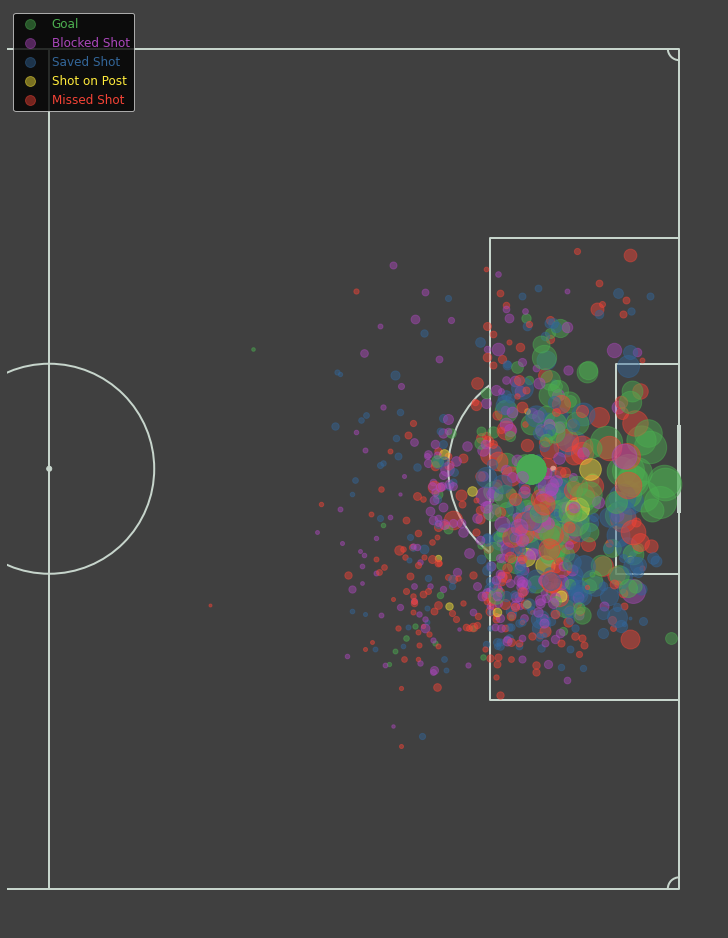

In [134]:
def PlotShots():
    
    df = pd.read_csv(f'{player_name}_shots_map.csv')
    fig, ax = plt.subplots(figsize=(13*2,8.5*2))
    fig.set_facecolor('#404040')
    ax.patch.set_facecolor('#404040')

    #The statsbomb pitch from mplsoccer
    pitch = mplsoccer.Pitch(pitch_type='statsbomb',
                            pitch_color='#404040', line_color='#c7d5cc',
                            half=True,corner_arcs=True)

    pitch.draw(ax=ax)

    #I invert the axis to make it so I am viewing it how I want
    plt.gca().invert_yaxis()

    #plot the points, you can use a for loop to plot the different outcomes if you want
    for i in range(len(df)):
        if df.Output[i] == 'Goal':
            ax.scatter(df['X'][i],df['Y'][i],c="#4CAF50",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#4CAF50')
        elif df.Output[i] == 'Blocked Shot':
            ax.scatter(df['X'][i],df['Y'][i],c="#AB47BC",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#AB47BC')
        elif df.Output[i] == 'Saved Shot':
            ax.scatter(df['X'][i],df['Y'][i],c="#336699",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#336699')
        elif df.Output[i] == 'Shot On Post':
            ax.scatter(df['X'][i],df['Y'][i],c="#FFEB3B",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#FFEB3B')
        else:
            ax.scatter(df['X'][i],df['Y'][i],s=df['xG'][i]*1100,c='#F44336',alpha=.45,marker='o',edgecolors='#F44336')

    points = [ax.scatter([0],[0],c=x,s=100,alpha=0.45,marker='o') for x in ['#4CAF50','#AB47BC','#336699','#FFEB3B','#F44336']]

    ax.legend(points,['Goal','Blocked Shot','Saved Shot','Shot on Post','Missed Shot'],
                      labelcolor = ['#4CAF50','#AB47BC','#336699','#FFEB3B','#F44336'],
                                        facecolor='black',loc='upper left',fontsize=12)

PlotShots()


## **Key passers**

In [135]:
def KeyPassers():
    
    '''This function will display the key passes for each player and store the data in a csv file''' 

    df = pd.read_csv(f'{player_name}_Shots_map.csv',index_col=0)
    df.head()
    df_shot = df.groupby(['Assisted by']).agg({"xG": "sum"}).sort_values(by='xG',ascending=False)

    assist_count = df.groupby(['Assisted by']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    df_goal = df[df['Output'] == 'Goal']
    df_goal = df_goal.groupby(['Assisted by']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    result = pd.concat([assist_count,df_shot,df_goal],axis=1)
    result.columns = ['# Of Key passes','xG','Goals']
    result.fillna(0,inplace=True)

    result['Goals'] = result['Goals'].astype(int)
    result['Goals difference'] = result['Goals'] - result['xG']
    result['Goals difference'] = result['Goals difference'].astype(float)
    result['xG'] = result['xG'].astype(float).round(3)
    result['# Of Key passes'] = result['# Of Key passes'].astype(int)
    result['Success Rate'] = result['Goals'] / result['# Of Key passes']*100
    result['Success Rate'] = result['Success Rate'].astype(float).round(2)
    result['Success Rate'] = result['Success Rate'].astype(str) + '%'
    result.sort_values(by='# Of Key passes',ascending=False,inplace=True)

    result.to_csv(f'{player_name}_Key_passers.csv',index=False)

    display(result.head(5))

KeyPassers()

,# Of Key passes,xG,Goals,Goals difference,Success Rate
Assisted by,,,,,
Individual,221,46.953,51,4.047,23.08%
Sadio Mané,86,12.461,12,-0.461,13.95%
Roberto Firmino,68,12.210,12,-0.210,17.65%
Trent Alexander-Arnold,63,7.896,6,-1.896,9.52%
Andrew Robertson,39,7.869,8,0.131,20.51%


## **Key Pass Types**

In [136]:
def KeyPassTypes():
    
    '''This function will display the key passes per type, and store the data in a csv file'''

    df = pd.read_csv(f'{player_name}_Shots_map.csv',index_col=0)
    df.head()
    df_shot = df.groupby(['Assist type']).agg({"xG": "sum"}).sort_values(by='xG',ascending=False)

    assist_count = df.groupby(['Assist type']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    df_goal = df[df['Output'] == 'Goal']
    df_goal = df_goal.groupby(['Assist type']).agg({"xG": "count"}).sort_values(by='xG',ascending=False)

    result = pd.concat([assist_count,df_shot,df_goal],axis=1)
    result.columns = ['# Of Key passes','xG','Goals']
    result.fillna(0,inplace=True)

    result['Goals'] = result['Goals'].astype(int)
    result['Goals difference'] = result['Goals'] - result['xG']
    result['Goals difference'] = result['Goals difference'].astype(float)
    result['xG'] = result['xG'].astype(float).round(3)
    result['# Of Key passes'] = result['# Of Key passes'].astype(int)
    result['Success Rate'] = result['Goals'] / result['# Of Key passes']*100
    result['Success Rate'] = result['Success Rate'].astype(float).round(2)
    result['Success Rate'] = result['Success Rate'].astype(str) + '%'

    result.sort_values(by='# Of Key passes',ascending=False,inplace=True)

    result.to_csv('KeyPassTypes.csv',index=False)

    display(result.head(5))

KeyPassTypes()

,# Of Key passes,xG,Goals,Goals difference,Success Rate
Assist type,,,,,
Pass,330,42.418,52,9.582,15.76%
None,105,13.177,14,0.823,13.33%
Chipped,84,10.022,11,0.978,13.1%
Take On,74,13.201,17,3.799,22.97%
Cross,71,9.809,7,-2.809,9.86%
